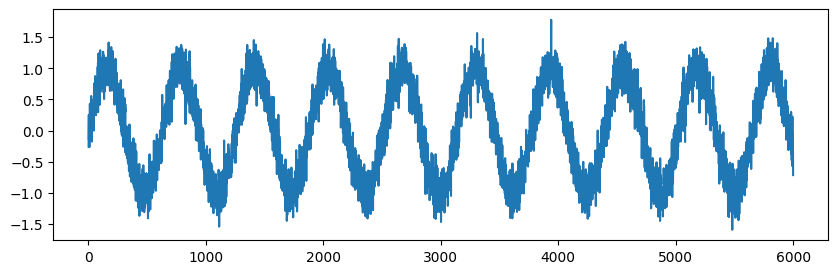

In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

T = 6000
time = torch.arange(1, T+1)
x = torch.sin(0.01 * time) + torch.randn(T) * 0.2

plt.figure(figsize=(10, 3))
plt.plot(time, x)

In [16]:
tau = 800
features = torch.zeros((T-tau, tau))

for i in range(tau):
    features[:, i]= x[i: T-tau+i]

y = x[tau: ].reshape(-1, 1)
y.shape

torch.Size([5200, 1])

In [25]:
from d2l import torch as d2l
from tqdm import tqdm

batch_size, n_train= 16, 1000
train_iter = d2l.load_array((features[:n_train], y[:n_train]), batch_size, is_train=True)

net = nn.Sequential(nn.Linear(tau, 1500), nn.ReLU(), nn.Linear(1500, 1))
updater = torch.optim.Adam(net.parameters(), lr=0.001)
criteria = nn.MSELoss()

loop = tqdm(range(5))
for epoch in loop:
    for idx, (feature, label) in enumerate(train_iter):
        y_hat = net(feature)
        loss = criteria(y_hat, label)
        updater.zero_grad()
        loss.backward()
        updater.step()
        loop.set_postfix({"loss":str(loss.item())})
        loop.set_description("epoch"+str(epoch))

epoch4: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s, loss=0.0625564381480217]  


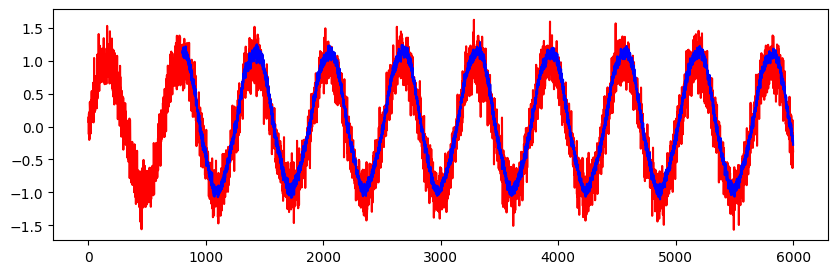

In [12]:
net.eval()
y = net(features)

plt.figure(figsize=(10, 3))
plt.plot(time, x, 'r')
plt.plot(time[tau:], y.detach(), 'b')

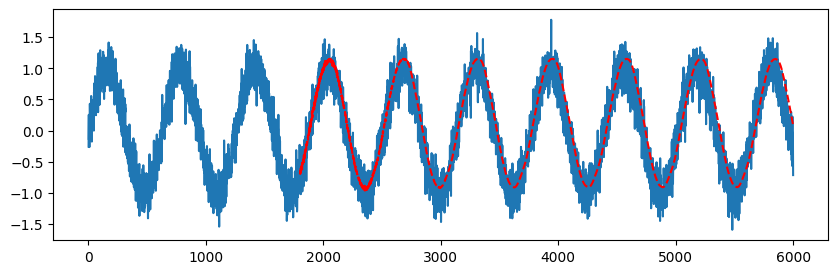

In [26]:
generate = torch.zeros(T)
generate[:n_train + tau] = x[:n_train + tau]
for i in range(n_train+tau, T):
    generate[i] = net( generate[i-tau:i] ).detach()

plt.figure(figsize=(10,3))
plt.plot(time, x)
plt.plot(time[n_train+tau: T], generate[n_train+tau: T], 'r--')

In [32]:
loss.data

tensor(0.0626)